# Notebook 1: Using minervachem to get individual chemical fingerprints

This notebook provides a quick demonstration of how minerva fingerprinters work and how to use them. 

## 1: Obtaining a molecule object

Minerva's fingerprinters expect molecules to be represented as rdkit molecules, so we will build those from smiles 
strings. RDKit has the appropriate functions.

In [1]:
from rdkit.Chem import MolFromSmiles, AddHs

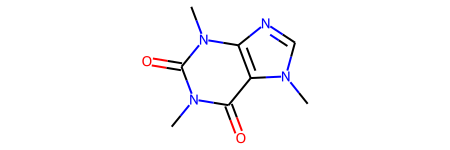

In [2]:
example_mols = [
    'CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccccc2)N2CCN(c3cccc(F)c3)CC2)CC1',
    'NCNOCOC',
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
    'CNO',
]

use_mol_number = 2 # change this to look at different molecules
mol = MolFromSmiles(example_mols[use_mol_number])
mol

We usually recommend to add explicit hydrogens for your fingerprints,
nonetheless most of the functions in minervachem work even if you do not.
Adding explicit hydrogens reduces the number of types of nodes in the graph.

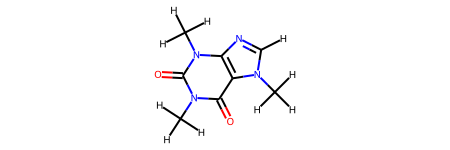

In [3]:
mol = AddHs(mol) 
mol

# 2: Building and using a fingerprinter

Here we construct a GraphletFingerprinter which is based on the induced subgraphs of a molecule.

In [4]:
from minervachem.fingerprinters import GraphletFingerprinter
my_fingerprinter = GraphletFingerprinter(
        max_len=4
    )

To use the fingerprinter, just pass it a molecule object:

In [5]:
fingerprint, bitinfo = my_fingerprinter(mol)

The first object returned, the fingerprint, is a dictionary.

They key is of the form tuple(int, int) and the value is of type int.

The first part of the key is the size of the corresponding substructure, and the second part is an integer which identifies the class of substructure.

The value is the count of that substructure in the molecule.


In [6]:
fingerprint

{(4, 23181438164775319247): 18,
 (3, 20956754416421011880): 1,
 (3, 9354288734830490742): 9,
 (4, 24510129258590684295): 6,
 (4, 21438690938136517623): 3,
 (2, 14883599216761571887): 9,
 (3, 24490668046650076795): 9,
 (2, 17253782156521110872): 8,
 (4, 16842928745510052563): 3,
 (3, 9256218735766784361): 5,
 (3, 18646655314378470690): 6,
 (4, 17277693070314694416): 9,
 (2, 19086238979012187030): 3,
 (1, 9990529426805722067): 3,
 (1, 26624454028907181204): 2,
 (1, 20784809936286627226): 10,
 (4, 24130445417674825347): 3,
 (4, 13892145619532610969): 3,
 (3, 22275384298421868455): 2,
 (4, 17984790473584722032): 3,
 (4, 12350142338912689573): 1,
 (4, 15754571834185773283): 4,
 (3, 10323548948296488315): 4,
 (3, 26299339248972200055): 3,
 (4, 19682473187366122270): 5,
 (4, 20424928098004743332): 1,
 (3, 10387847931347882557): 1,
 (4, 13675677674002015374): 1,
 (2, 19343290194310077138): 2,
 (4, 11949075299763288848): 1,
 (4, 26001244308378976466): 4,
 (3, 23128196567294160369): 3,
 (1, 1279

The second object returned, the bitinfo, is also a dictionary, with the same key structure.

However, the value structure gives indices that locate the substructure in the molecule.

Because the same substructure class may appear multiples in a given molecule, the value is a list of lists.

For graphlet fingerprints, the location indices are atom indices.

In [7]:
bitinfo

{(4, 23181438164775319247): [[0, 16, 2, 1],
  [8, 9, 21, 13],
  [0, 1, 5, 15],
  [0, 1, 5, 14],
  [0, 1, 2, 15],
  [8, 9, 13, 23],
  [0, 1, 5, 16],
  [20, 11, 4, 12],
  [8, 9, 13, 22],
  [18, 11, 4, 12],
  [8, 13, 6, 23],
  [0, 1, 2, 14],
  [9, 18, 11, 12],
  [9, 11, 20, 12],
  [8, 13, 6, 22],
  [8, 21, 13, 6],
  [11, 9, 19, 12],
  [19, 11, 4, 12]],
 (3, 20956754416421011880): [[5, 6, 7]],
 (3, 9354288734830490742): [[18, 19, 12],
  [21, 13, 22],
  [18, 20, 12],
  [0, 16, 14],
  [13, 22, 23],
  [19, 20, 12],
  [13, 21, 23],
  [0, 16, 15],
  [0, 14, 15]],
 (4, 24510129258590684295): [[8, 9, 11, 6],
  [1, 2, 3, 5],
  [11, 2, 3, 4],
  [8, 9, 11, 4],
  [11, 9, 3, 4],
  [1, 2, 3, 4]],
 (4, 21438690938136517623): [[3, 4, 5, 6], [8, 4, 5, 6], [11, 4, 5, 6]],
 (2, 14883599216761571887): [[13, 23],
  [13, 22],
  [18, 12],
  [20, 12],
  [19, 12],
  [21, 13],
  [0, 14],
  [0, 16],
  [0, 15]],
 (3, 24490668046650076795): [[0, 16, 1],
  [18, 11, 12],
  [8, 21, 13],
  [8, 13, 22],
  [0, 1, 14],
  [1

Naturally, the fingerprint can easily be reconstructed from the more bitinfo object:

In [8]:
{k:len(v) for k,v in bitinfo.items()} == fingerprint

True

In [9]:
first_bit = next(iter(bitinfo.keys())) # grab one key from the bi dictionary.
print("First bit type:",first_bit)
print("Number of Occurences:",fingerprint[first_bit])
print("Locations:",bitinfo[first_bit])

First bit type: (4, 23181438164775319247)
Number of Occurences: 18
Locations: [[0, 16, 2, 1], [8, 9, 21, 13], [0, 1, 5, 15], [0, 1, 5, 14], [0, 1, 2, 15], [8, 9, 13, 23], [0, 1, 5, 16], [20, 11, 4, 12], [8, 9, 13, 22], [18, 11, 4, 12], [8, 13, 6, 23], [0, 1, 2, 14], [9, 18, 11, 12], [9, 11, 20, 12], [8, 13, 6, 22], [8, 21, 13, 6], [11, 9, 19, 12], [19, 11, 4, 12]]


We can also plot individual bits:

0 : Bit (4, 23181438164775319247)


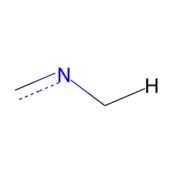

1 : Bit (3, 20956754416421011880)


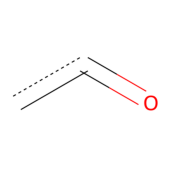

2 : Bit (3, 9354288734830490742)


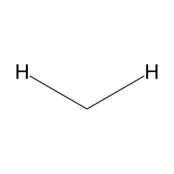

3 : Bit (4, 24510129258590684295)


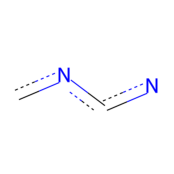

4 : Bit (4, 21438690938136517623)


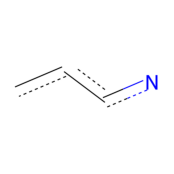

In [10]:
from minervachem.plotting import draw_ss
import matplotlib.pyplot as plt
number_of_bits_to_show=5
for i,(bit_label,occurences) in enumerate(bitinfo.items()):
    if i >= number_of_bits_to_show:
        break
    print(i,": Bit",bit_label)
    first_occurence = occurences[0]
    fig,ax = plt.subplots(figsize=(2,2),dpi=100)
    im=draw_ss(mol,first_occurence)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

# 3: Available Minerva Fingerprinters

Minerva currently supports three types of fingerprints.

1) Graphlet: Induced subgraph fingerprints
2) RDKit: Graph-walks using the RDKit fingerprint algorithm.
3) Morgan: Classicl Radial Algorithm via RDKit implementation.

The Fingerprinters in minervachem provide a simplified and unified interface to featurizing molecules with each of these algorithms.

In [11]:
from minervachem.fingerprinters import MorganFingerprinter, RDKitFingerprinter, GraphletFingerprinter

In [12]:
help(GraphletFingerprinter)

Help on class GraphletFingerprinter in module minervachem.fingerprinters.graphletfingerprinter:

class GraphletFingerprinter(builtins.object)
 |  GraphletFingerprinter(max_len=3, useHs=False)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, mol)
 |      Call self as a function.
 |  
 |  __init__(self, max_len=3, useHs=False)
 |      A class to produce graphlet fingerprints
 |      
 |      The size component of the bit ID corresponds to the number of atoms in the graphlet. 
 |      
 |      :param max_len: int, the largest number of atoms to consider for induced subgraphs
 |      :param useHs: bool, whether to use explicit hydrogens
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [13]:
help(MorganFingerprinter)

Help on class MorganFingerprinter in module minervachem.fingerprinters.morganfingerprinter:

class MorganFingerprinter(builtins.object)
 |  MorganFingerprinter(radius, use_counts=True, n_bits=None)
 |  
 |  A minervachem wrapper to Morgan fingerprints from RDKit
 |  
 |  Note that here, the size component of the bit ID corresponds to radius. 
 |  
 |  :param radius: the maximum radius used for FP construction
 |  :use counts: indicator for count-based or boolean fingerprints
 |  :n_bits: if None, do not hash, else hash to the given size
 |  
 |  Methods defined here:
 |  
 |  __call__(self, mol)
 |      Call self as a function.
 |  
 |  __init__(self, radius, use_counts=True, n_bits=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak r

In [14]:
help(RDKitFingerprinter)

Help on class RDKitFingerprinter in module minervachem.fingerprinters.rdkitfingerprinter:

class RDKitFingerprinter(builtins.object)
 |  RDKitFingerprinter(minPath=1, maxPath=7, useHs=True, branchedPaths=True, useBondOrder=True, atomInvariants=0, fromAtoms=0, atomBits=None)
 |  
 |  A minervachem fingerprinter for rdkit fingerprints
 |  
 |  Currently only supports unfolded count-based fingerprints. 
 |  
 |  The arguments are passed directly to UnfoldedRDKFingerprintCountBased
 |  
 |  Note that the size component of the bit IDs correspond to the number of bonds present in the fragment
 |  
 |  Methods defined here:
 |  
 |  __call__(self, mol)
 |      Fingerprint a molecule with rdkit fingerprints 
 |      
 |      :param mol: an RDKit Molecule
 |      :return fp: a dict mapping substructure IDs to counts
 |      :return bi: a dict mapping substructure IDs to a list of lists, where the inner lists are the set of bonds for a given occurence of the substructure
 |  
 |  __init__(self, 

# 4 Plotting all the substructures in a molecule

In [15]:
from minervachem.plotting import plot_fingerprint

In [16]:
?plot_fingerprint

Signature:
plot_fingerprint(
    mol,
    fingerprinter,
    ncol=3,
    figsize=None,
    decreasing=True,
    show_count=True,
    show_bit_ids=True,
    show_size=True,
)
Docstring:
Plot all of the substructures induced in mol by fingerprinter.

Note that if the fingerprinter produces folded bits, this will only show the first one found.


Args:
    mol: (rdkit.Molecule) the molecule to be fingerprinted
    fingerprinter: a minerva.fingerprinters.Fingerprinter object
    ncol: (int) the number of columns in the plot (n_rows = ceil(n_fragments / n_cols))
    figsize: passed to plt.subplots
    decreasing: (bool) sort fragments in order of decreasing size (if False, sort in increasing order)
    show_count: (bool) show the count of each fragment in the molecule
    show_bit_ids: (bool) show the ID of each bit
    show_size: (bool) show the size of the fragment (this is also included in the bit ID)
File:      ~/Documents/LANL/minervachem/minervachem/plotting.py
Type:      function

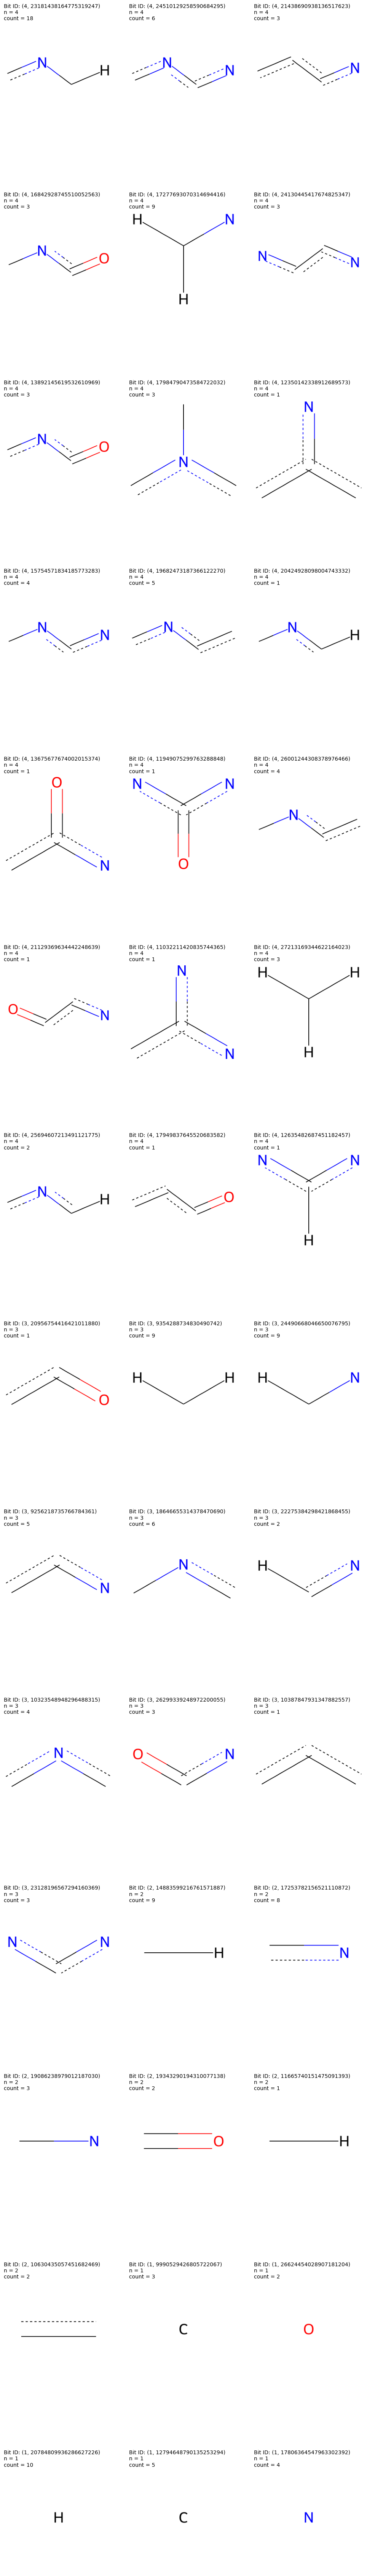

In [17]:
plot_fingerprint(mol, my_fingerprinter);